D1. Operasi Citra Sederhana

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


 Melakukan transformasi linier brightness dengan memasukkan nilai konstanta tertentu
dan menghasilkan warna. Seperti yang telah dibahas pada ulasan teori, formula untuk
melakukan transformasi linier brightness adalah sebagai berikut:

g(𝑥,𝑦) = 𝑓(𝑥,𝑦)+ 𝑏  </br>

dimana g(x,y) adalah nilai pixel setelah transformasi, f(x,y) adalah nilai pixel asli, dan b
adalah nilai brightness.
Tuliskan potongan kode berikut untuk mengimplementasikan linier brightness pada
google colab:

Transformasi Linier Bigtness

 Mengubah tingkat kecerahan citra 
----------------------------------
Masukkan nilai kecerahan: 23


/tmp/ipython-input-3297130205.py:20: RuntimeWarning: overflow encountered in scalar add
  brightness_image[y, x, c] = np.clip(original[y, x, c] + brightness, 0, 255)


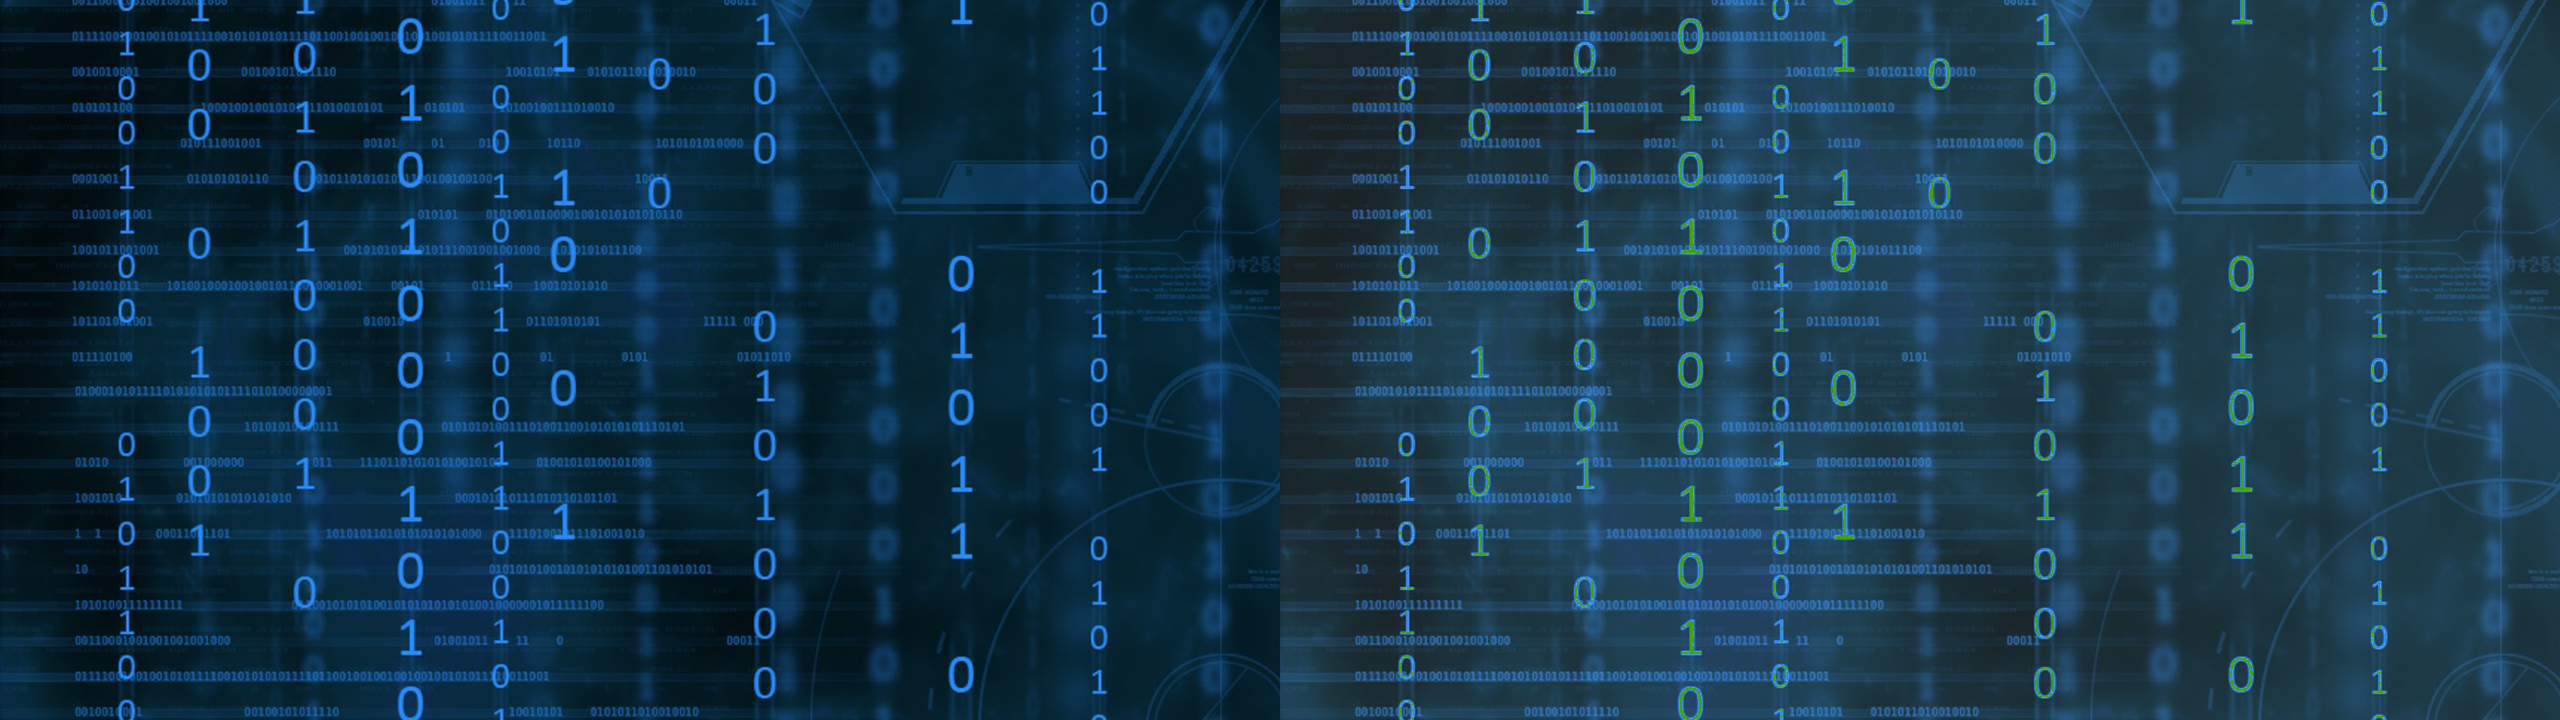

In [43]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

print(' Mengubah tingkat kecerahan citra ')
print('----------------------------------')

try:
    brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
    print('Error, not a number')

original = cv2.imread('/content/drive/MyDrive/Blends Amlit_36.png')
brightness_image = np.zeros(original.shape, original.dtype)

# akses per piksel
for y in range(original.shape[0]):
    for x in range(original.shape[1]):
        for c in range(original.shape[2]):
            brightness_image[y, x, c] = np.clip(original[y, x, c] + brightness, 0, 255)


final_frame = cv2.hconcat([original, brightness_image])
cv2_imshow(final_frame)

Dari potongan kode di atas dapat dilihat bahwa ketika dijalankan, system akan
menampilkan text field untuk memasukkan konstanta nilai brightness yang diinginkan,
dan akan disimpan pada variabel brightness. Kemudian ditentukan citra pada drive yang
akan diolah dan ditampung di variabel original. Tahap selanjutnya adalah mengakses
pixel citra masukan dengan 3 perulangan. Perulangan pertama dilakukan pada shape[0]
untuk tinggi citra, perulangan kedua dilakukan pada shape[1] untuk lebar citra, dan
perulangan ketiga dilakukan pada shape[2] yang merupakan channel warna pada citra.
Setelah melakukan 3 perulangan, dilakukan transformasi linier brightness dengan cara
menambahkan nilai brightness pada citra masukan.

TUGAS PRAKTIKUM D1

1. Implementasikan inverse citra pada Google Colaboratory menggunakan formula yang
terdapat pada bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:  
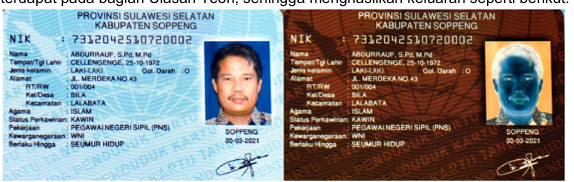

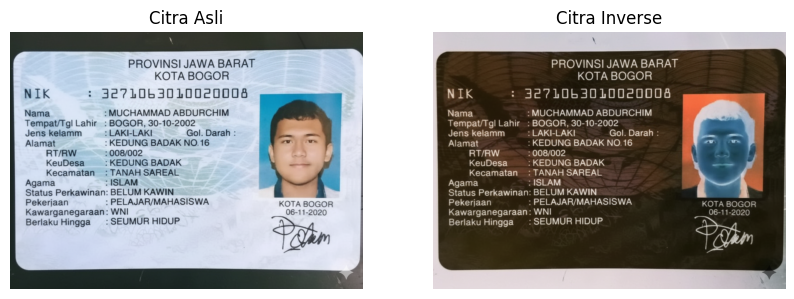

In [44]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("/content/KTP_OHIM.png")

# Konversi BGR (OpenCV default) ke RGB agar warnanya benar
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Terapkan inverse citra (L-1-r)
inverse_img = 255 - img_rgb

# Tampilkan hasil
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(img_rgb)
plt.title("Citra Asli")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(inverse_img)
plt.title("Citra Inverse")
plt.axis("off")

plt.show()

2. Implementasikan transformasi contrast pada Google Colaboratory menggunakan
formula yang terdapat pada bagian Ulasan Teori untuk kontras, sehingga
menghasilkan keluaran seperti berikut:

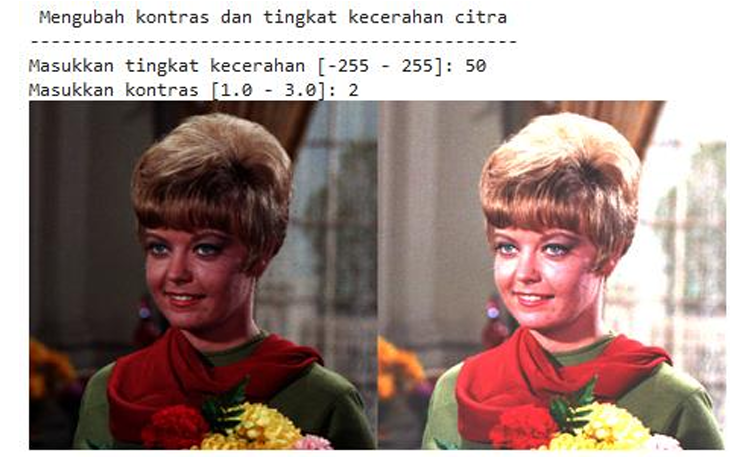

In [45]:
print(" Mengubah kontras dan tingkat kecerahan citra ")
print("------------------------------------------------")

# Input nilai dari user
brightness = int(input("Masukkan tingkat kecerahan [-255 - 255]: "))
contrast = float(input("Masukkan kontras [1.0 - 3.0]: "))

# Baca gambar
img = cv2.imread("/content/female.tiff")
if img is None:
    print("Gambar tidak ditemukan, cek path!")
else:
    # Ubah brightness dan contrast
    adjusted = cv2.convertScaleAbs(img, alpha=contrast, beta=brightness)

    # Gabungkan gambar asli dan hasil
    final_frame = cv2.hconcat([img, adjusted])

    # Tampilkan hasil
    cv2_imshow(final_frame)

 Mengubah kontras dan tingkat kecerahan citra 
------------------------------------------------
Masukkan tingkat kecerahan [-255 - 255]: 23
Masukkan kontras [1.0 - 3.0]: 2


3. Implementasikan transformasi logarithmic brightness pada Google Colaboratory
menggunakan formula yang terdapat pada bagian Ulasan Teori untuk transformasi
log, sehingga menghasilkan keluaran seperti berikut:

 Mengubah tingkat kecerahan citra dengan Transformasi Log 
---------------------------------------------------------
Masukkan nilai kecerahan: 23


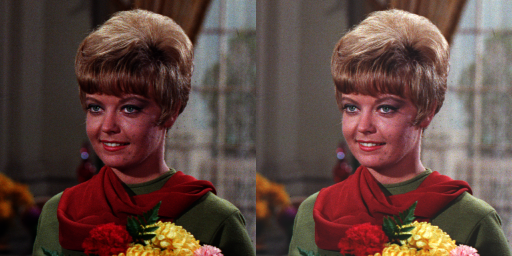

In [46]:
print(" Mengubah tingkat kecerahan citra dengan Transformasi Log ")
print("---------------------------------------------------------")

# Input brightness dari user
brightness = int(input("Masukkan nilai kecerahan: "))

# Baca gambar
img = cv2.imread('/content/female.tiff')  # baca gambar warna
if img is None:
    print("Gambar tidak ditemukan, cek path!")
else:
    # Normalisasi ke rentang [0,1]
    img_normalized = img / 255.0

    # Hitung konstanta c
    c = 255 / np.log(1 + np.max(img_normalized))

    # Terapkan transformasi log
    log_transformed = c * np.log(1 + img_normalized)

    # Tambahkan brightness
    log_brightness = np.clip(log_transformed + brightness, 0, 255)

    # Konversi ke uint8 agar bisa ditampilkan
    log_brightness = np.array(log_brightness, dtype=np.uint8)

    # Gabungkan gambar asli dan hasil
    final_frame = cv2.hconcat([img, log_brightness])

    # Tampilkan hasil
    cv2_imshow(final_frame)

4. Implementasikan transformasi grayscale menggunakan metode averaging, lightness,
dan luminance pada Google Colaboratory menggunakan formula yang terdapat pada
bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:
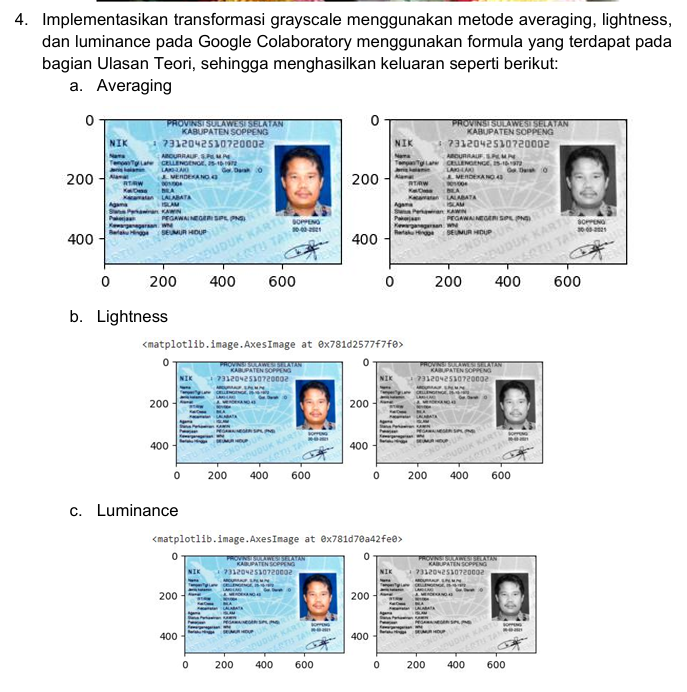

In [47]:
img = cv2.imread('/content/KTP_OHIM.png')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Pisahkan channel
R = img_rgb[:,:,0]
G = img_rgb[:,:,1]
B = img_rgb[:,:,2]

# 1. Grayscale Averaging
gray_avg = ((R.astype(np.float32) + G.astype(np.float32) + B.astype(np.float32)) / 3).astype(np.uint8)

# 2. Grayscale Lightness
gray_lightness = ((np.max(img_rgb, axis=2) + np.min(img_rgb, axis=2)) / 2).astype(np.uint8)

# 3. Grayscale Luminance
gray_luminance = (0.299*R + 0.587*G + 0.114*B).astype(np.uint8)

# --- Tampilkan hasil ---
plt.figure(figsize=(12,8))

# Asli + Averaging
plt.subplot(3,2,1); plt.imshow(img_rgb); plt.title("Asli"); plt.axis("off")
plt.subplot(3,2,2); plt.imshow(gray_avg, cmap='gray'); plt.title("Grayscale - Averaging"); plt.axis("off")

# Asli + Lightness
plt.subplot(3,2,3); plt.imshow(img_rgb); plt.title("Asli"); plt.axis("off")
plt.subplot(3,2,4); plt.imshow(gray_lightness, cmap='gray'); plt.title("Grayscale - Lightness"); plt.axis("off")

# Asli + Luminance
plt.subplot(3,2,5); plt.imshow(img_rgb); plt.title("Asli"); plt.axis("off")
plt.subplot(3,2,6); plt.imshow(gray_luminance, cmap='gray'); plt.title("Grayscale - Luminance"); plt.axis("off")

plt.tight_layout()
plt.show()

5. Tampilkanlah warna tertentu pada citra, dan ubah warna lain menjadi grayscale. Misal,
tampilkan warna biru pada citra masukan dan ubah bagian lain yang tidak berwarna
biru menjadi grayscale seperti pada contoh berikut:
Screenshot 2025-09-09 202703.png

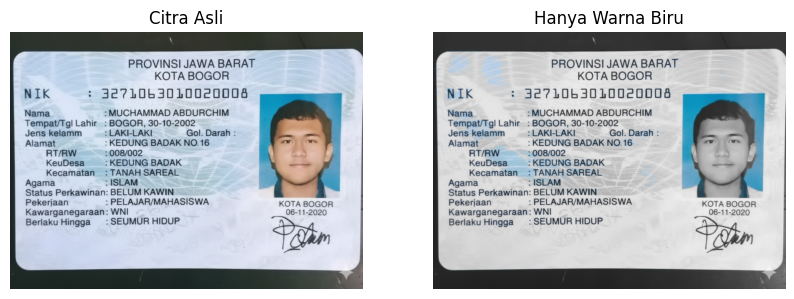

In [48]:
img = cv2.imread('/content/KTP_OHIM.png')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Konversi ke HSV (lebih mudah untuk deteksi warna)
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Rentang warna biru (HSV)
lower_blue = np.array([90, 50, 50])   # batas bawah
upper_blue = np.array([130, 255, 255]) # batas atas

# Buat mask untuk warna biru
mask = cv2.inRange(hsv, lower_blue, upper_blue)

# Buat citra grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray_rgb = cv2.cvtColor(gray, cv2.COLOR_GRAY2RGB)

# Gabungkan: warna biru tetap, lain jadi grayscale
result = np.where(mask[:,:,None].astype(bool), img_rgb, gray_rgb)

# --- Tampilkan hasil ---
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(img_rgb)
plt.title("Citra Asli")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(result)
plt.title("Hanya Warna Biru")
plt.axis("off")

plt.show()

D2. Operasi Aritmatika dan Logika

1. Buat Gamma Correction sesuai dengan petunjuk berikut

Gamma correction pada citra
-------------------------------
Masukkan nilai gamma: 3
-------------------------------


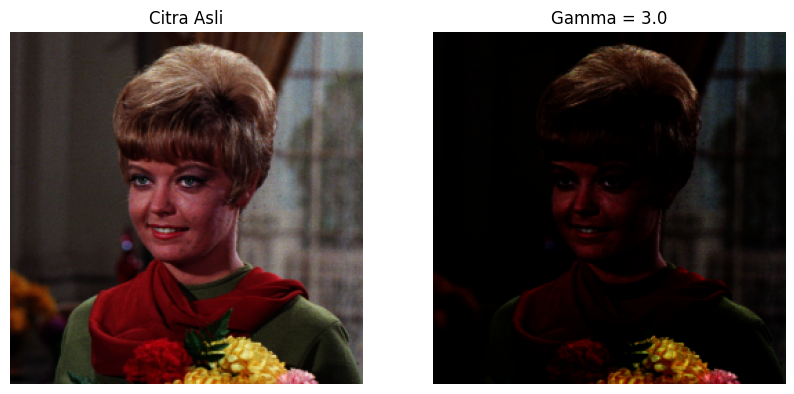

In [49]:
print("Gamma correction pada citra")
print("-------------------------------")

try:
    gamma = float(input("Masukkan nilai gamma: "))
    print("-------------------------------")
except:
    print("Error, gunakan angka!")

# Baca gambar
img = cv2.imread("/content/female.tiff")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Normalisasi [0,1]
normalized = img_rgb / 255.0

# Terapkan gamma correction
gamma_corrected = np.power(normalized, gamma)

# Ubah kembali ke [0,255]
gamma_corrected = np.uint8(gamma_corrected * 255)

# --- Tampilkan hasil ---
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(img_rgb)
plt.title("Citra Asli")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(gamma_corrected)
plt.title(f"Gamma = {gamma}")
plt.axis("off")

plt.show()

2. Buat Simulasi Image Depth

Percobaan ini digunakan sebagai simulasi dari proses kuantisasi citra. Pada kuantisasi
citra, pixel dapat direpresentasikan dengan n-bit kedalaman (default menggunakan 8-bit).
Pada pixel 8-bit, warna yang memungkinkan adalah 256 warna, dari 0 (0000 0000) hingga
255(1111 1111). Pada pixel 7-bit, warna yang memungkinkan adalah 128 warna, dari 0
(000 0000) hingga 127 (111 1111). Kemungkinan warna didapat dari pangkat 2 jumlah bit.
Jika 7bit, maka jumlah warnanya adalah 27 = 128, dst.
Screenshot 2025-09-09 204148.png

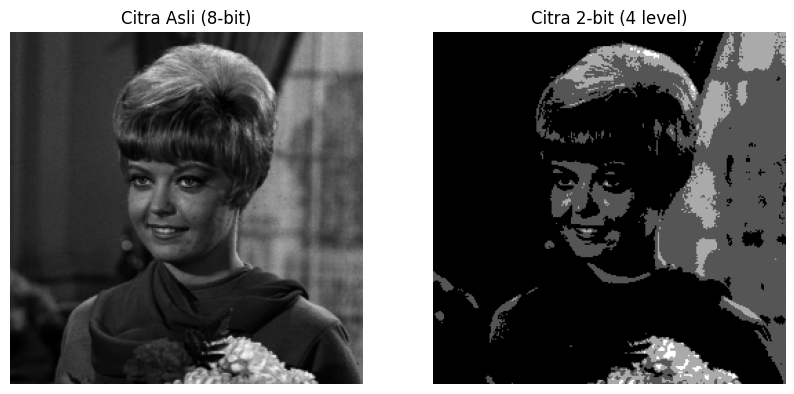

In [50]:
# Set bit depth (misalnya 2, 3, 4, dst.)
bit_depth = 2
levels = 2 ** bit_depth   # jumlah level warna

# Baca citra grayscale
original = cv2.imread('/content/female.tiff',
                      cv2.IMREAD_GRAYSCALE)

# Normalisasi ke [0, levels-1]
quantized = np.floor(original / (256/levels)) * (255/(levels-1))
quantized = np.uint8(quantized)

# --- Tampilkan hasil ---
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(original, cmap='gray')
plt.title("Citra Asli (8-bit)")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(quantized, cmap='gray')
plt.title(f"Citra {bit_depth}-bit ({levels} level)")
plt.axis("off")

plt.show()

3. Buat modul Average Denoising

Buat modul average denoising sesuai dengan rumus yang telah diberikan pada sub bab
sebelumnya.  
Citra asli sudah disediakan pada /images/galaxy.jpg.
100 Citra dengan Gaussian Noise sudah disediakan pada /images/noises/*.jpg
Anda dapat menggunakan code berikut untuk membaca semua image dalam satu folder ,
gunakan modul glob (import glob).

In [3]:
import glob
def psnr(img1, img2):
    mse = np.mean((img1.astype(np.float32) - img2.astype(np.float32)) ** 2)
    if mse == 0:
        return float('inf')
    PIXEL_MAX = 255.0
    return 20 * np.log10(PIXEL_MAX / np.sqrt(mse))

# Read the original image
img_bgr = cv2.imread('/content/drive/MyDrive/PCVK/galaxy.jpg')
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

cv_img = []
# Read all noisy images
for img_path in glob.glob('/content/drive/MyDrive/PCVK/3.jpg'):
    n = cv2.imread(img_path)
    cv_img.append(n)

averages = [10, 20, 40, 80, 100]
psnr_values = []

fig, axes = plt.subplots(len(averages), 3, figsize=(12, 10))
plt.subplots_adjust(wspace=0.05, hspace=0.2)

for i, n_img in enumerate(averages):
    stacked = np.zeros_like(cv_img[0], dtype=np.float32)
    for j in range(n_img):
        stacked += cv_img[j].astype(np.float32)
    avg_img = stacked / n_img
    avg_img = np.uint8(np.clip(avg_img, 0, 255))

    avg_rgb = cv2.cvtColor(avg_img, cv2.COLOR_BGR2RGB)
    value_psnr = psnr(img_bgr, avg_img)
    psnr_values.append(value_psnr)

    axes[i,0].imshow(img_rgb)
    axes[i,0].set_title("Original")
    axes[i,0].axis("off")

    axes[i,1].imshow(avg_rgb)
    axes[i,1].set_title(f"Average {n_img}")
    axes[i,1].axis("off")

    axes[i,2].text(0.5, 0.5, f"PSNR:\n{value_psnr:.2f} dB",
                   ha="center", va="center", fontsize=11)
    axes[i,2].set_axis_off()

plt.show()

plt.figure(figsize=(6,4))
plt.plot(averages, psnr_values, marker="o")
plt.title("PSNR vs Jumlah Citra di Average")
plt.xlabel("Jumlah Citra di Average")
plt.ylabel("PSNR (dB)")
plt.grid(True)
plt.show()

NameError: name 'cv2' is not defined